## Part 1 : EDA and data preprocessing

In [ ]:
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install -U kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.figure_factory as ff

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
# setting Jedha color palette as default
pio.templates["jedha"] = go.layout.Template(
    layout_colorway=["#4B9AC7", "#4BE8E0", "#9DD4F3", "#97FBF6", "#2A7FAF", "#23B1AB", "#0E3449", "#015955"]
)
pio.templates.default = "jedha"
pio.renderers.default = "svg" # to be replaced by "iframe" if working on JULIE
pd.set_option('display.max_row', 150)

In [ ]:
# Import dataset
print("Loading dataset...")
dataset = pd.read_csv("https://julie-2-next-resources.s3.eu-west-3.amazonaws.com/full-stack-part-time/projects-supervised-machine-learning-pt/walmart-sales-pt/Walmart_Store_sales.csv")
print("...Done.")
print()

Loading dataset...
...Done.



In [ ]:
dataset.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
2,17.0,27-07-2012,NaN,0.0,NaN,NaN,130.719581,5.936
3,11.0,NaN,1244390.03,0.0,84.57,NaN,214.556497,7.346
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092


##  Preprocessing to be planned with pandas

In [ ]:
# Basic stats
data_desc = dataset.describe(include='all')
print(dataset.shape)
data_desc

(150, 8)


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,150.000000,132,1.360000e+02,138.000000,132.000000,136.000000,138.000000,135.000000
unique,NaN,85,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,19-10-2012,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN
mean,9.866667,NaN,1.249536e+06,0.079710,61.398106,3.320853,179.898509,7.598430
std,6.231191,NaN,6.474630e+05,0.271831,18.378901,0.478149,40.274956,1.577173
min,1.000000,NaN,2.689290e+05,0.000000,18.790000,2.514000,126.111903,5.143000
25%,4.000000,NaN,6.050757e+05,0.000000,45.587500,2.852250,131.970831,6.597500
50%,9.000000,NaN,1.261424e+06,0.000000,62.985000,3.451000,197.908893,7.470000
75%,15.750000,NaN,1.806386e+06,0.000000,76.345000,3.706250,214.934616,8.150000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         150 non-null    float64
 1   Date          132 non-null    object 
 2   Weekly_Sales  136 non-null    float64
 3   Holiday_Flag  138 non-null    float64
 4   Temperature   132 non-null    float64
 5   Fuel_Price    136 non-null    float64
 6   CPI           138 non-null    float64
 7   Unemployment  135 non-null    float64
dtypes: float64(7), object(1)
memory usage: 9.5+ KB


- Taget variable : Y = 'Weekly_Sales'
- Explanatory variables : 'Store', 'Date', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment'
- lignes et colonnes : 150, 8
- types de variables : quantitatives : 7
- Analyse des valeurs manquantes : 
    - Présence de NaN
    - La variable 'Weekly_Sales'
 est notre variable cible donc nous allons tout simplement supprimer les valeurs manquantes de cette colonne !




In [ ]:
# Evaluation du nombre de valeurs manquantes

(dataset.isna().sum()/dataset.shape[0]).sort_values(ascending=True)

Store           0.000000
Holiday_Flag    0.080000
CPI             0.080000
Weekly_Sales    0.093333
Fuel_Price      0.093333
Unemployment    0.100000
Date            0.120000
Temperature     0.120000
dtype: float64

## Elimination des lignes inutiles de la variable target

In [ ]:
dataset.dropna(subset = ['Weekly_Sales'], axis = 0, inplace = True)
dataset.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
3,11.0,NaN,1244390.03,0.0,84.57,NaN,214.556497,7.346
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092
5,4.0,28-05-2010,1857533.70,0.0,NaN,2.756,126.160226,7.896


## Conversion de la colonne 'Date' en type Datetime

In [ ]:
dataset.loc[:,'Date'] = pd.to_datetime(dataset['Date']);
dataset = dataset.sort_values(by = 'Date');
dataset.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136 entries, 14 to 146
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         136 non-null    float64       
 1   Date          118 non-null    datetime64[ns]
 2   Weekly_Sales  136 non-null    float64       
 3   Holiday_Flag  125 non-null    float64       
 4   Temperature   121 non-null    float64       
 5   Fuel_Price    124 non-null    float64       
 6   CPI           125 non-null    float64       
 7   Unemployment  122 non-null    float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 9.6 KB


<ipython-input-27-c3e31f6ca64c>:1: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.

<ipython-input-27-c3e31f6ca64c>:1: DeprecationWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`



## Conversion des variables 'Store', 'Holiday_Flag' en variables catégorielles

In [ ]:
dataset[['Store', 'Holiday_Flag']] = dataset[['Store', 'Holiday_Flag']].astype("object")

dataset.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 136 entries, 14 to 146
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         136 non-null    object        
 1   Date          118 non-null    datetime64[ns]
 2   Weekly_Sales  136 non-null    float64       
 3   Holiday_Flag  125 non-null    object        
 4   Temperature   121 non-null    float64       
 5   Fuel_Price    124 non-null    float64       
 6   CPI           125 non-null    float64       
 7   Unemployment  122 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(2)
memory usage: 9.6+ KB


## Création des nouvelles colonnes contenant les caractéristiques numériques 'year', 'month', 'day', 'day of week'.

In [ ]:
# Extraction de l'année
dataset.loc[:, 'Year'] = dataset['Date'].dt.year

# Extraction du mois
dataset.loc[:, 'Month'] = dataset['Date'].dt.month

# Extraction du jour du mois
dataset.loc[:, 'Day'] = dataset['Date'].dt.day

# Extraction du jour de la semaine (0 correspond à Lundi)
dataset.loc[:, 'Day of week'] = dataset['Date'].dt.dayofweek

dataset.head()


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Day of week
14,17.0,2010-01-10,829207.27,0.0,60.07,2.853,126.234600,6.885,2010.0,1.0,10.0,6.0
20,7.0,2010-02-04,561145.14,0.0,38.26,2.725,189.704822,8.963,2010.0,2.0,4.0,3.0
47,19.0,2010-02-07,1549018.68,0.0,66.25,2.958,132.521867,8.099,2010.0,2.0,7.0,6.0
99,13.0,2010-02-07,2018314.71,0.0,78.82,2.814,126.139200,7.951,2010.0,2.0,7.0,6.0
112,2.0,2010-02-19,2124451.54,0.0,39.69,2.514,210.945160,NaN,2010.0,2.0,19.0,4.0


In [ ]:
dataset.loc[:, 'Day of week'].unique()

array([ 6.,  3.,  4.,  1.,  5.,  0., nan])

## Suppression des lignes contenant des valeurs abérantes

In [ ]:
upper_bound = dataset[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].mean()+dataset[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].std()*3
upper_bound

Temperature     116.397263
Fuel_Price        4.755613
CPI             298.820458
Unemployment     12.523867
dtype: float64

In [ ]:
lower_bound = dataset[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].mean()-dataset[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].std()*3
lower_bound

Temperature      5.310671
Fuel_Price       1.878371
CPI             57.361830
Unemployment     2.807297
dtype: float64

In [ ]:
mask = (dataset[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']] < upper_bound) &(dataset[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']] > lower_bound)
mask

,Temperature,Fuel_Price,CPI,Unemployment
14,True,True,True,True
20,True,True,True,True
47,True,True,True,True
99,True,True,True,True
112,True,True,True,False
115,False,True,True,False
106,True,False,False,True
23,True,True,True,True
143,True,True,True,True
28,True,True,True,True


In [ ]:
dataset = dataset.loc[mask['Temperature'], :]
dataset = dataset.loc[mask['Fuel_Price'], :]
dataset = dataset.loc[mask['CPI'], :]
dataset = dataset.loc[mask['Unemployment'], :]
dataset.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Day of week
14,17.0,2010-01-10,829207.27,0.0,60.07,2.853,126.234600,6.885,2010.0,1.0,10.0,6.0
20,7.0,2010-02-04,561145.14,0.0,38.26,2.725,189.704822,8.963,2010.0,2.0,4.0,3.0
47,19.0,2010-02-07,1549018.68,0.0,66.25,2.958,132.521867,8.099,2010.0,2.0,7.0,6.0
99,13.0,2010-02-07,2018314.71,0.0,78.82,2.814,126.139200,7.951,2010.0,2.0,7.0,6.0
23,19.0,2010-03-26,1427023.45,0.0,39.07,2.963,131.863129,8.350,2010.0,3.0,26.0,4.0


<Axes: >

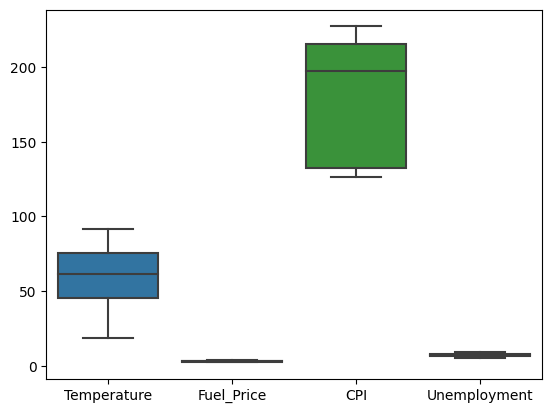

In [ ]:
sns.boxplot(dataset[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']])

## histogrames des variables continues

<ipython-input-36-2e472c95a745>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-36-2e472c95a745>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-36-2e472c95a745>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use ei

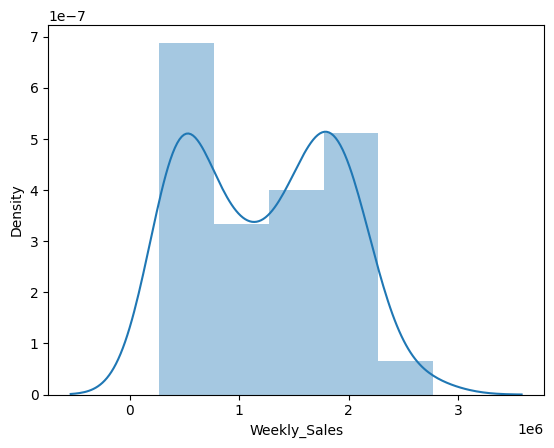

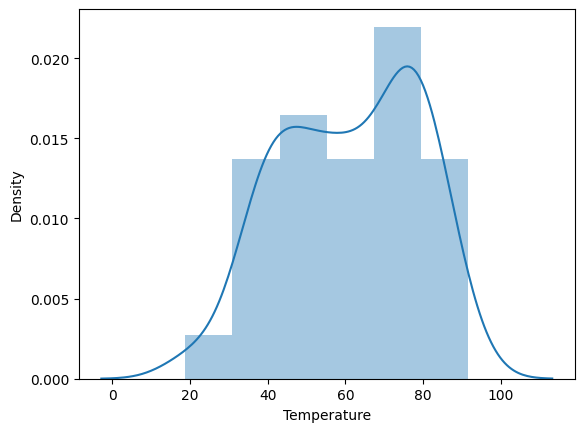

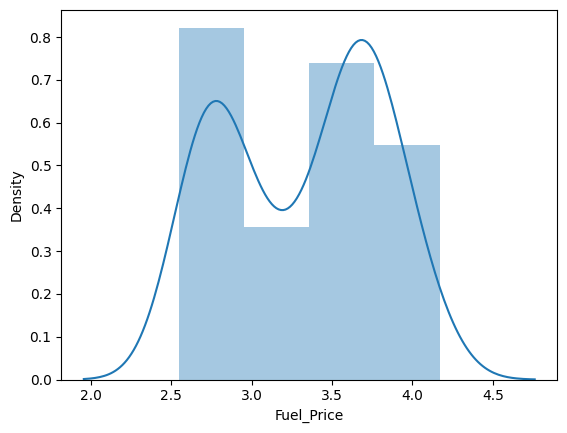

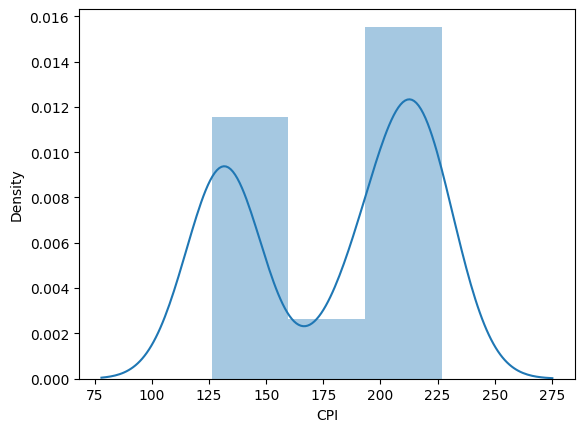

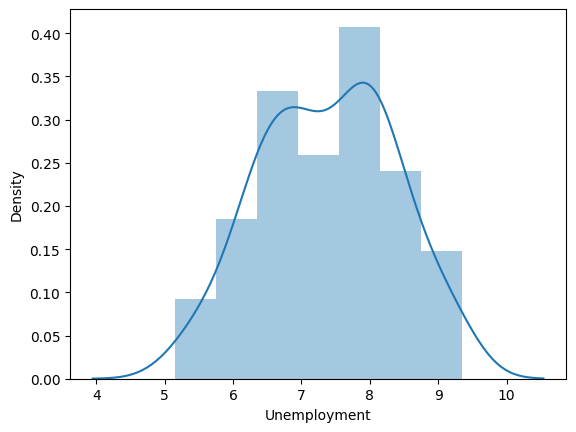

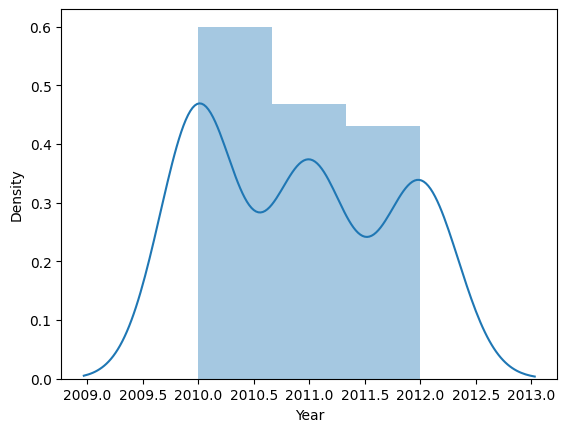

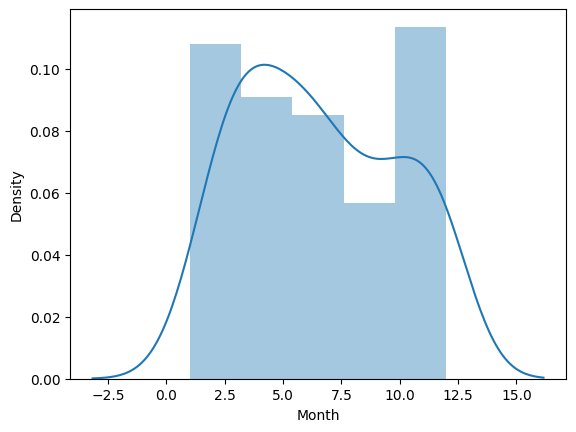

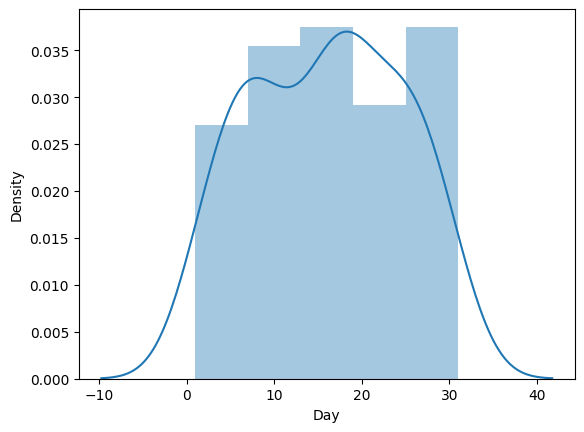

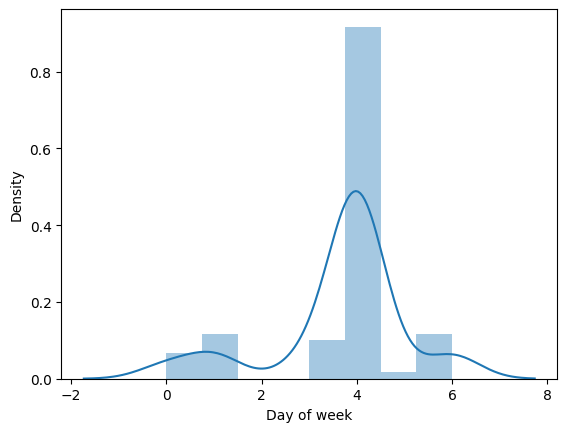

In [ ]:
for col in dataset.select_dtypes('float'):
    plt.figure();
    sns.distplot(dataset[col]);

## Diagramme à barres des variables qualitatives

Text(0.5, 1.0, 'Distribution of Store')

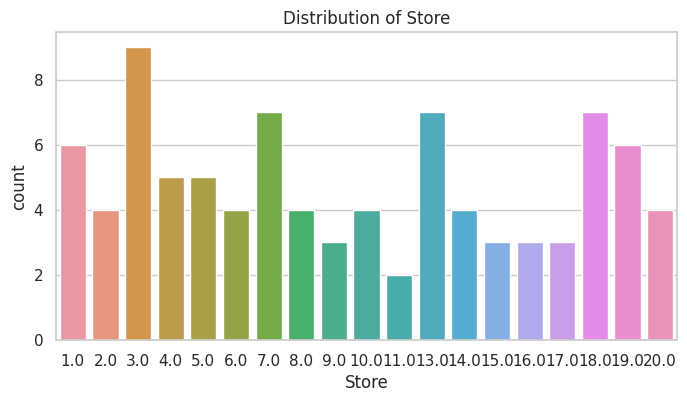

In [ ]:
plt.figure(figsize=(8,4))
sns.set(style="whitegrid", color_codes=True)
sns.countplot(x='Store', data=dataset)
plt.title('Distribution of Store')

Le graphique "Distribution of Store" représente la distribution des données de la colonne "Store" du dataset. Il montre le nombre de fois où chaque magasin apparaît dans le dataset.

L'axe des x montre les différents magasins, tandis que l'axe des y montre le nombre de fois où chaque magasin apparaît dans le dataset. On peut constater que les magasins 3, 7 et 13 ont le plus grand nombre d'occurrences dans notre dataset, tandis que le magasin 12 a le moins grand nombre d'occurrences.

Ce graphique peut être utile pour comprendre la répartition des données du dataset entre les différents magasins, et peut aider à identifier les magasins qui ont un plus grand impact sur les ventes hebdomadaires de Walmart.

Text(0.5, 1.0, 'Distribution of Holiday_Flag')

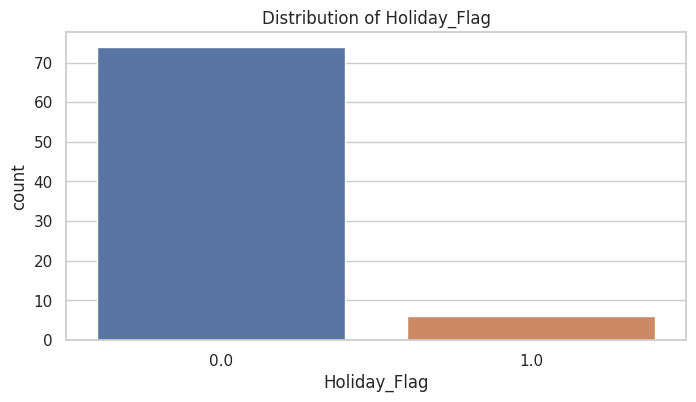

In [ ]:
plt.figure(figsize=(8,4))
sns.set(style="whitegrid", color_codes=True)
sns.countplot(x='Holiday_Flag', data=dataset)
plt.title('Distribution of Holiday_Flag')

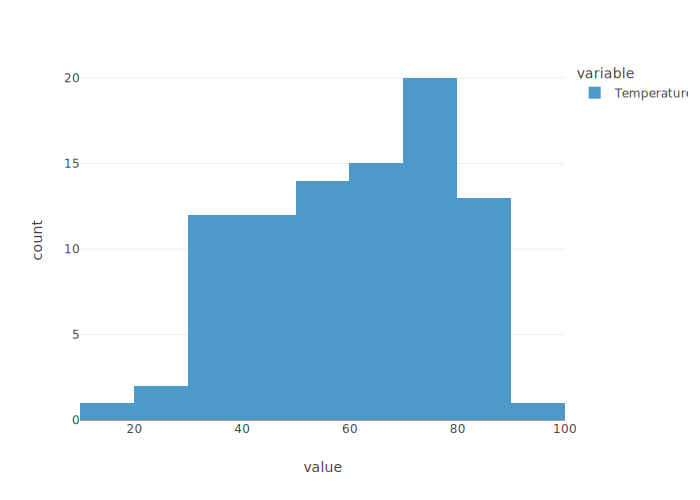

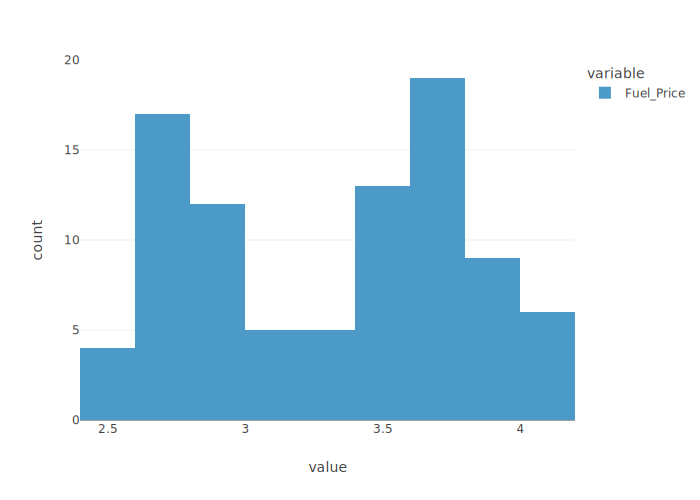

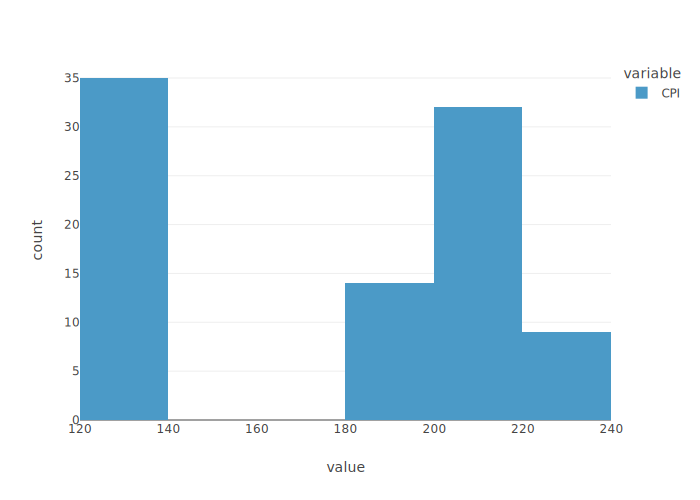

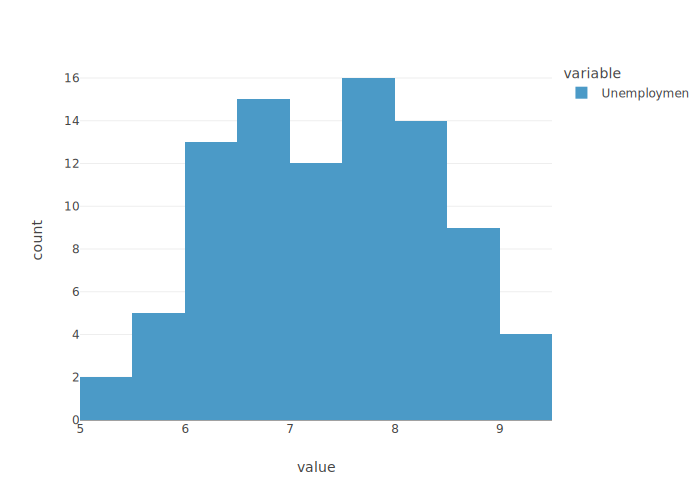

In [ ]:
# Univariate analysis
# Distribution of each numeric variable
num_features = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']
for i in range(len(num_features)):
    fig = px.histogram(dataset[num_features[i]])
    fig.show()

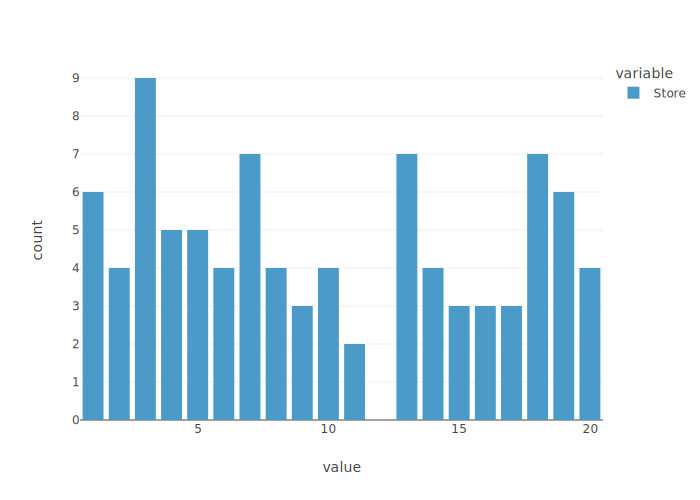

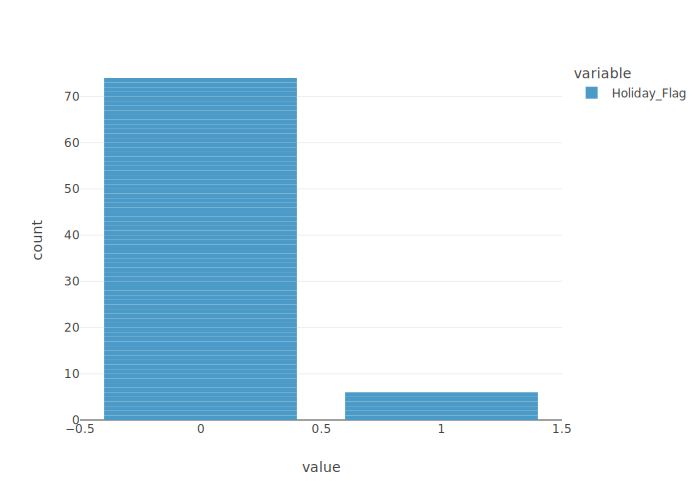

In [ ]:
# Univariate analysis
# Barplot of each qualitative variable
cat_features = ['Store', 'Holiday_Flag']
for i in range(len(cat_features)):
    fig = px.bar(dataset[cat_features[i]])
    fig.show()

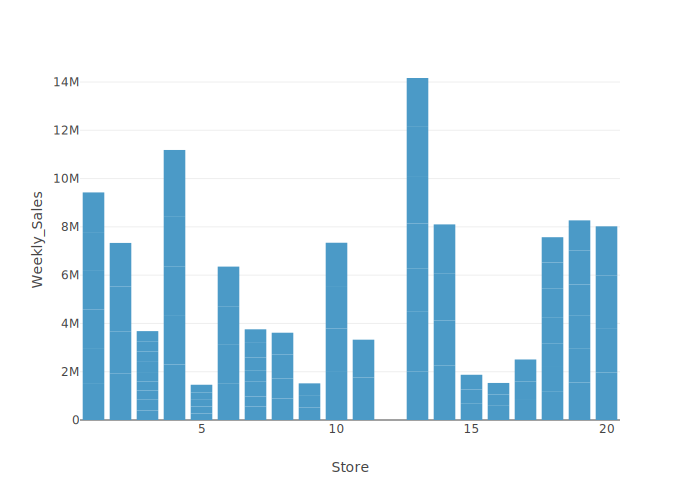

In [ ]:
fig = px.bar(dataset, x ='Store', y = 'Weekly_Sales')
fig.show()

In [ ]:
# Coefficient d'asymétrie

dataset.skew().sort_values()      # la variable "Holiday_Flag" est très asymétrique

<ipython-input-95-de6a75ee4ebe>:3: FutureWarning:

The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



Day of week    -1.120334
CPI            -0.326435
Temperature    -0.262191
Fuel_Price     -0.127748
Unemployment   -0.067658
Day            -0.035723
Weekly_Sales    0.085588
Store           0.182389
Year            0.214521
Month           0.215482
Holiday_Flag    3.289132
dtype: float64

<ipython-input-41-46cee7f862b8>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



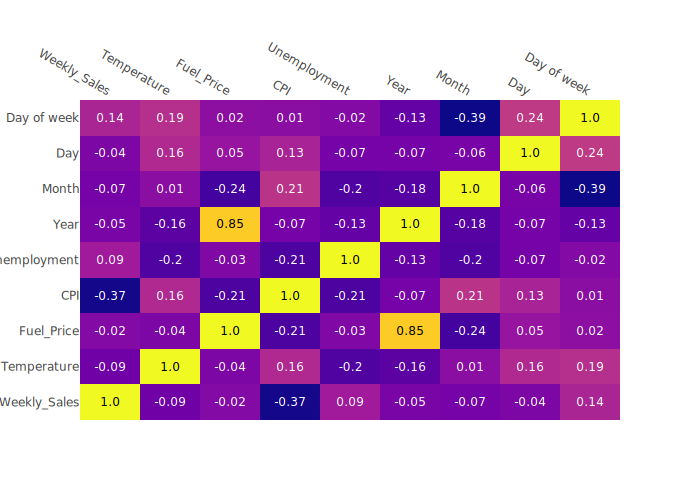

In [ ]:
# Correlation matrix
corr_matrix = dataset.corr().round(2)

import plotly.figure_factory as ff

fig = ff.create_annotated_heatmap(corr_matrix.values,
                                  x = corr_matrix.columns.tolist(),
                                  y = corr_matrix.index.tolist())


fig.show()

In [ ]:
# Separate target variable Y from features X
print("Separating labels from features...")
features_list = ['Store', 'Holiday_Flag','Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month', 'Day', 'Day of week']
target_variable = "Weekly_Sales"

X = dataset.loc[:,features_list]
Y = dataset.loc[:,target_variable]

print("...Done.")
print()

print('Y : ')
print(Y.head())
print()
print('X :')
print(X.head())

Separating labels from features...
...Done.

Y : 
14     829207.27
20     561145.14
47    1549018.68
99    2018314.71
23    1427023.45
Name: Weekly_Sales, dtype: float64

X :
   Store Holiday_Flag  Temperature  Fuel_Price         CPI  Unemployment  \
14  17.0          0.0        60.07       2.853  126.234600         6.885   
20   7.0          0.0        38.26       2.725  189.704822         8.963   
47  19.0          0.0        66.25       2.958  132.521867         8.099   
99  13.0          0.0        78.82       2.814  126.139200         7.951   
23  19.0          0.0        39.07       2.963  131.863129         8.350   

      Year  Month   Day  Day of week  
14  2010.0    1.0  10.0          6.0  
20  2010.0    2.0   4.0          3.0  
47  2010.0    2.0   7.0          6.0  
99  2010.0    2.0   7.0          6.0  
23  2010.0    3.0  26.0          4.0  


In [ ]:
# Automatically detect names of numeric/categorical columns
numeric_features = []
categorical_features = []
for i,t in X.dtypes.iteritems():
    if ('float' in str(t)) or ('int' in str(t)) :
        numeric_features.append(i)
    else :
        categorical_features.append(i)

print('Found numeric features ', numeric_features)
print('Found categorical features ', categorical_features)

Found numeric features  ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month', 'Day', 'Day of week']
Found categorical features  ['Store', 'Holiday_Flag']


<ipython-input-43-0f0a515c43b5>:4: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



In [ ]:
# Divide dataset Train set & Test set 
print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print("...Done.")
print()

Dividing into train and test sets...
...Done.



## Preprocessing

In [ ]:
# Create pipeline for numeric features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')), # missing values will be replaced by columns' mean
    ('scaler', StandardScaler())
])

In [ ]:
# Create pipeline for categorical features
categorical_transformer = Pipeline(
    steps=[
    ('encoder', OneHotEncoder(drop='first')) # first column will be dropped to avoid creating correlations between features
    ])

In [ ]:
# Use ColumnTransformer to make a preprocessor object that describes all the treatments to be done
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [ ]:
# Preprocessings on train set
print("Performing preprocessings on train set...")
print(X_train.head())
X_train = preprocessor.fit_transform(X_train)
print('...Done.')
print(X_train[0:5]) # MUST use this syntax because X_train is a numpy array and not a pandas DataFrame anymore
print()

# Preprocessings on test set
print("Performing preprocessings on test set...")
print(X_test.head()) 
X_test = preprocessor.transform(X_test) # Don't fit again !! The test set is used for validating decisions
# we made based on the training set, therefore we can only apply transformations that were parametered using the training set.
# Otherwise this creates what is called a leak from the test set which will introduce a bias in all your results.
print('...Done.')
print(X_test[0:5,:]) # MUST use this syntax because X_test is a numpy array and not a pandas DataFrame anymore
print()

Performing preprocessings on train set...
    Store Holiday_Flag  Temperature  Fuel_Price         CPI  Unemployment  \
87    3.0          0.0        75.19       3.688  225.235150         6.664   
38    4.0          0.0        81.85       3.570  129.066300         5.946   
120   8.0          0.0        75.32       2.582  214.878556         6.315   
28   17.0          0.0        45.22       2.915  126.562100         6.635   
7    20.0          0.0        39.93       3.617  213.023622         6.961   

       Year  Month   Day  Day of week  
87   2012.0   11.0   5.0          0.0  
38   2011.0    6.0  24.0          4.0  
120  2010.0    9.0  17.0          4.0  
28   2010.0    4.0  16.0          4.0  
7    2012.0    3.0   2.0          4.0  
...Done.
[[ 0.76430537  0.74095112  1.12501934 -0.80837353  1.36436688  1.52098291
  -1.43356211 -2.87084626  0.          1.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0

## Train model

In [ ]:
# Train model
print("Train model...")
regressor = LinearRegression()
regressor.fit(X_train, Y_train)
print("...Done.")

Train model...
...Done.


### Performance assessment

In [ ]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = regressor.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

Predictions on training set...
...Done.
[ 473888.69092122 2028281.67418042  921025.60329823  775811.86014179
 2108121.44440795  868752.75846286  391185.62410571  392343.46892367
  588337.16514428 1080889.86116591 1820111.18617396 2119639.83679565
 1612508.06893793  351468.88562536 1625062.32844491  874872.56496173
  343926.76754025 1947549.98487218  663950.94132623 2073387.56267312
 2022226.49632345 1360159.83126795 2016264.79825695 1357044.72565324
  466884.48568642 1534316.15134576  435135.27304945 1107701.5773259
  484330.54207161  811134.16985822 1982980.34794316  950741.60327718
 1199458.64431546 1260154.63572003 2116629.59878641  365549.30988318
 1634073.76823661 1872906.87452706 1852564.34689658 1990946.94472546
 1850710.57449551  618869.47899155 1634252.4927921   391836.60456011
  468124.66198572 2024941.29280803 1525428.66876778 1654077.54728034
  450772.80100649 1030979.24464605 1056730.0153284   971350.1966672
  530338.35801429  607475.44        427662.14089959 1124384.64055

In [ ]:
# Predictions on test set
print("Predictions on test set...")
Y_test_pred = regressor.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

Predictions on test set...
...Done.
[1435102.52413795  376225.75666844 1622585.60699585  421285.26715643
 1415869.43434711 1899972.98945511 2012797.45337829 1906680.64519705
  741824.80892887 1906545.05971017 1573990.50576149  481091.71576471
  591976.50919765  638931.08671514  418481.43609794  273460.91332102
 2199578.66041658 2069291.91636941]



In [ ]:
# Print R^2 scores
print("R2 score on training set : ", r2_score(Y_train, Y_train_pred))
print("R2 score on test set : ", r2_score(Y_test, Y_test_pred))

R2 score on training set :  0.9849077780774407
R2 score on test set :  0.9377527249422412


### Interpreting the model's coefficients
As we've standardized our features, we can use the coefficients of the regression to estimate the importance of each feature for the prediction. The model's parameters are saved in a `.coef_` attribute:

In [ ]:
regressor.coef_

array([    7248.55364817,   -66717.92151511,   678650.02975644,
          53491.66892003,     9632.59982403,    -2263.14605298,
         -33786.08333103,    -9670.76197341,   284348.437283  ,
       -1253168.4763178 ,  2121591.06095117, -1205989.98820294,
         121241.9674721 ,  -702673.40017319,  -658934.43152638,
       -1075067.15197155,  1765970.88828447,    57704.61256643,
        1997289.55327878,   957491.90254065,   501513.97933873,
        -586373.84715838,   772037.41291825,   853312.52241177,
        1218708.89184677,   594126.02352113,   -22034.02658394,
         -36244.74471842])

Each coefficient can be linked with the name of the corresponding feature by 
digging into the different pipelines that were used to produce the final version of the X_train/X_test arrays:

In [ ]:
column_names = []
for name, pipeline, features_list in preprocessor.transformers_: # loop over pipelines
    if name == 'num': # if pipeline is for numeric variables
        features = features_list # just get the names of columns to which it has been applied
    else: # if pipeline is for categorical variables
        features = pipeline.named_steps['encoder'].get_feature_names_out() # get output columns names from OneHotEncoder
    column_names.extend(features) # concatenate features names
        
print("Names of columns corresponding to each coefficient: ", column_names)

Names of columns corresponding to each coefficient:  ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month', 'Day', 'Day of week', 'Store_2.0', 'Store_3.0', 'Store_4.0', 'Store_5.0', 'Store_6.0', 'Store_7.0', 'Store_8.0', 'Store_9.0', 'Store_10.0', 'Store_11.0', 'Store_13.0', 'Store_14.0', 'Store_15.0', 'Store_16.0', 'Store_17.0', 'Store_18.0', 'Store_19.0', 'Store_20.0', 'Holiday_Flag_1.0', 'Holiday_Flag_nan']


In [ ]:
# Create a pandas DataFrame
coefs = pd.DataFrame(index = column_names, data = regressor.coef_.transpose(), columns=["coefficients"])
coefs

,coefficients
Temperature,7.248554e+03
Fuel_Price,-6.671792e+04
CPI,6.786500e+05
Unemployment,5.349167e+04
Year,9.632600e+03
Month,-2.263146e+03
Day,-3.378608e+04
Day of week,-9.670762e+03
Store_2.0,2.843484e+05
Store_3.0,-1.253168e+06


:::warning Comparison in absolute values
The feature importance is related to the absolute values of the coefficients. Don't forget to compute the absolute value before concluding !
:::

In [ ]:
# Compute abs() and sort values
feature_importance = abs(coefs).sort_values(by = 'coefficients')
feature_importance

,coefficients
Month,2.263146e+03
Temperature,7.248554e+03
Year,9.632600e+03
Day of week,9.670762e+03
Holiday_Flag_1.0,2.203403e+04
Day,3.378608e+04
Holiday_Flag_nan,3.624474e+04
Unemployment,5.349167e+04
Store_11.0,5.770461e+04
Fuel_Price,6.671792e+04


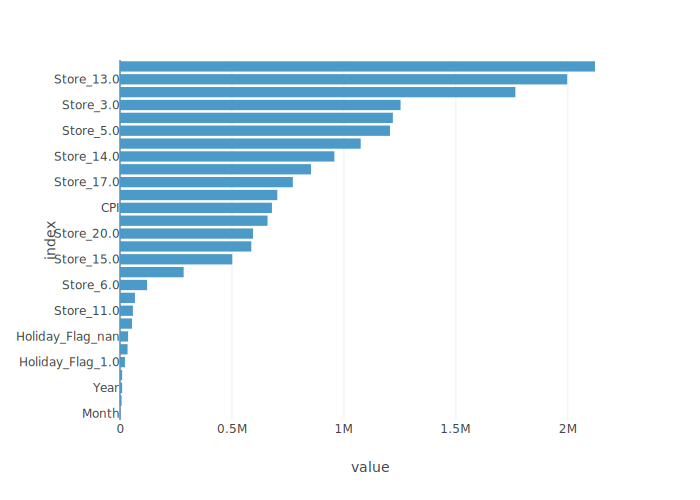

In [ ]:
# Plot coefficients
fig = px.bar(feature_importance, orientation = 'h')
fig.update_layout(showlegend = False, 
                  margin = {'l': 120} # to avoid cropping of column names
                 )
fig.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) # to avoid deprecation warnings

Instanciate a linear regression model, a lasso with alpha=1, alpha = 0.01, and alpha = 0.0001

In [ ]:
lin = LinearRegression()
lasso1 = Lasso(alpha = 1)
lasso001 = Lasso(alpha = 0.01)
lasso00001 = Lasso(alpha = 0.0001)

Train the models

In [ ]:
lin.fit(X_train, Y_train)
lasso1.fit(X_train, Y_train)
lasso001.fit(X_train, Y_train)
lasso00001.fit(X_train, Y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.277e+11, tolerance: 2.952e+09

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.284e+11, tolerance: 2.952e+09

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.284e+11, tolerance: 2.952e+09



Lasso(alpha=0.0001)

Produce the performance scores for these four models: use the `.score` method to get the $R^2$ on the train set, then the test set, and compute the MSE on both sets as well. How can you interpret the results?

In [ ]:
baseline_pred = [Y_test.values.mean()]*len(Y_test)
print("Train scores \n")
print("Score Baseline : {} \nScore Lin : {} \nScore Lasso1 : {} \nScore Lasso001 : {} \nScore Lasso00001 : {}".format(r2_score(Y_test, baseline_pred),
lin.score(X_train, Y_train),
lasso1.score(X_train, Y_train),
lasso001.score(X_train, Y_train),
lasso00001.score(X_train,Y_train)))

Train scores 

Score Baseline : 0.0 
Score Lin : 0.9849077780774407 
Score Lasso1 : 0.9845231206708028 
Score Lasso001 : 0.9845239719767302 
Score Lasso00001 : 0.9845239803506877


In [ ]:
baseline_pred = [Y_test.values.mean()]*len(Y_test)
print("Test scores \n")
print("Score Baseline : {} \nScore Lin : {} \nScore Lasso1 : {} \nScore Lasso001 : {} \nScore Lasso00001 : {}".format(r2_score(Y_test, baseline_pred),
lin.score(X_test, Y_test),
lasso1.score(X_test, Y_test),
lasso001.score(X_test, Y_test),
lasso00001.score(X_test,Y_test)))

Test scores 

Score Baseline : 0.0 
Score Lin : 0.9377527249422412 
Score Lasso1 : 0.9384955152199 
Score Lasso001 : 0.9385072554300644 
Score Lasso00001 : 0.9385073727383775


In [ ]:
print("Train MSE \n")

print("MSE Baseline : {} \nMSE Lin : {} \nMSE Lasso1 : {} \nMSE Lasso001 : {} \nMSE Lasso00001 : {}".format(mean_squared_error(Y_test, baseline_pred),
mean_squared_error(Y_train,lin.predict(X_train)),
mean_squared_error(Y_train,lasso1.predict(X_train)),
mean_squared_error(Y_train,lasso001.predict(X_train)),
mean_squared_error(Y_train,lasso00001.predict(X_train))))

Train MSE 

MSE Baseline : 543203197331.9544 
MSE Lin : 6187784151.954812 
MSE Lasso1 : 6345493004.69625 
MSE Lasso001 : 6345143970.7797575 
MSE Lasso00001 : 6345140537.472081


In [ ]:
print("Test MSE \n")

print("MSE Baseline : {} \nMSE Lin : {} \nMSE Lasso1 : {} \nMSE Lasso001 : {} \nMSE Lasso00001 : {}".format(mean_squared_error(Y_test, baseline_pred),
mean_squared_error(Y_test,lin.predict(X_test)),
mean_squared_error(Y_test,lasso1.predict(X_test)),
mean_squared_error(Y_test,lasso001.predict(X_test)),
mean_squared_error(Y_test,lasso00001.predict(X_test))))

Test MSE 

MSE Baseline : 543203197331.9544 
MSE Lin : 33812918836.57625 
MSE Lasso1 : 33409432782.804802 
MSE Lasso001 : 33403055463.1062 
MSE Lasso00001 : 33402991740.855453


the proportion of coefficients equal to zero, can you display the value distribution for these coefficients.

Linear Regression 
 Proportion of coefficients equal to zero
0.0

 Distribution of coefficients 



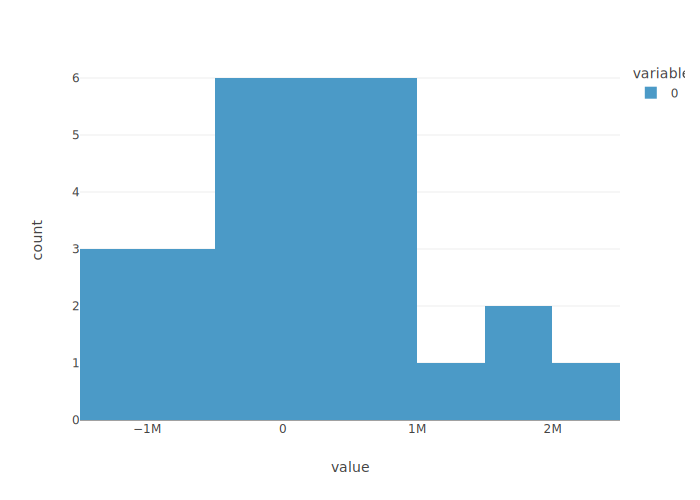

In [ ]:
print("Linear Regression \n Proportion of coefficients equal to zero")
print(np.sum(lin.coef_==0)/len(lin.coef_))
print("\n Distribution of coefficients \n")
px.histogram(lin.coef_)

Lasso 1 
 Proportion of coefficients equal to zero
0.0

 Distribution of coefficients 



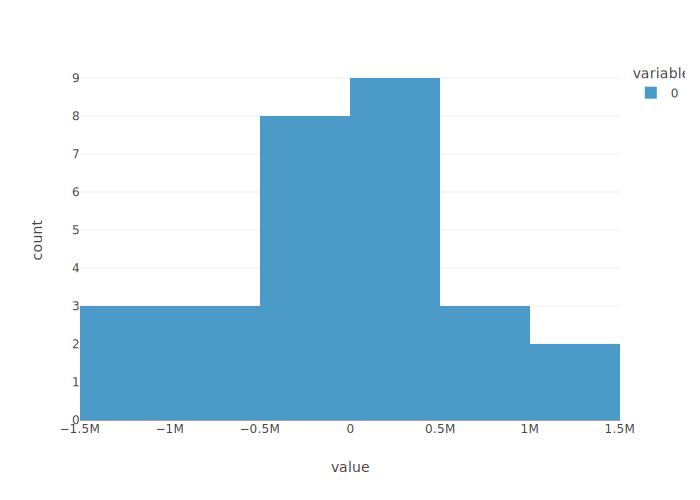

In [ ]:
print("Lasso 1 \n Proportion of coefficients equal to zero")
print(np.sum(lasso1.coef_==0)/len(lasso1.coef_))
print("\n Distribution of coefficients \n")
px.histogram(lasso1.coef_)

Lasso 0.01 
 Proportion of coefficients equal to zero
0.0

 Distribution of coefficients 



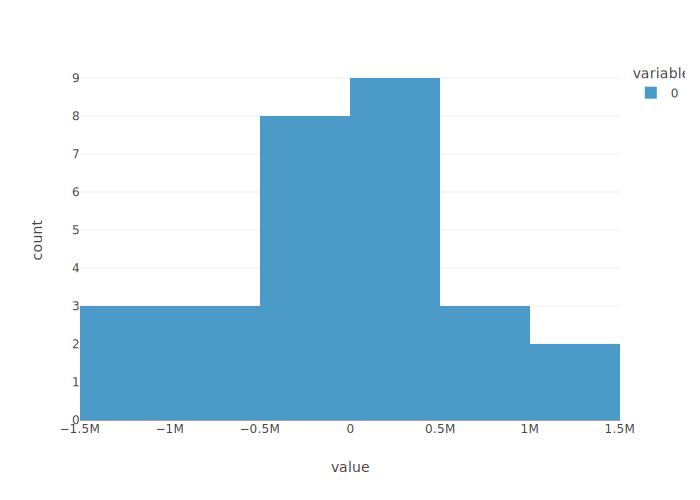

In [ ]:
print("Lasso 0.01 \n Proportion of coefficients equal to zero")
print(np.sum(lasso001.coef_==0)/len(lasso001.coef_))
print("\n Distribution of coefficients \n")
px.histogram(lasso001.coef_)

Lasso 0.0001 
 Proportion of coefficients equal to zero
0.0

 Distribution of coefficients 



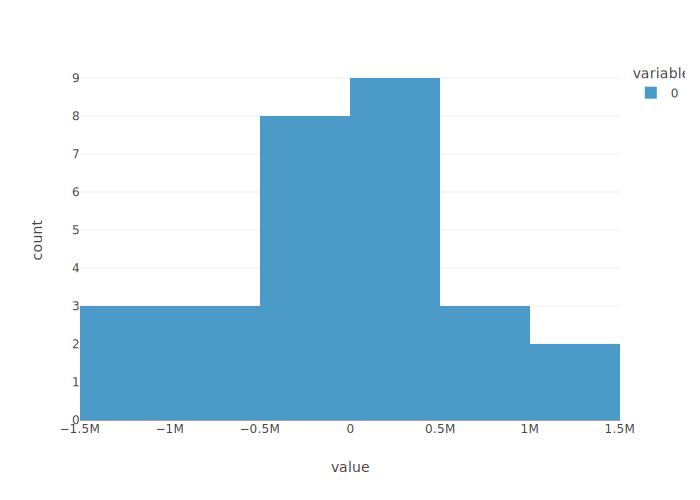

In [ ]:
print("Lasso 0.0001 \n Proportion of coefficients equal to zero")
print(np.sum(lasso00001.coef_==0)/len(lasso00001.coef_))
print("\n Distribution of coefficients \n")
px.histogram(lasso00001.coef_)

The linear regression model seems to achieve slightly better performance than the LASSO model, however the number of non-zero parameters for linear regression is extremely high, making this model impossible to interpret.

LASSO on the other hand achieves comparable performances for a well chosen penalization parameter and sets to zero almost all parameters, making it very easy to select which variables are important predictors and which ones are not.


Use the GridSearchCV function in order to look for the best penalization parameter for the LASSO model. Try looking for all negative powers of ten from 1 all the way to 10E-9. You can use cv=10 and verbose=1.

In [ ]:
params = {'alpha' : [10**(-a) for a in range(10)]}
lasso = Lasso()
grid = GridSearchCV(lasso,param_grid=params, cv = 10, verbose=1)

grid.fit(X_train,Y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.109e+11, tolerance: 2.546e+09

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.842e+11, tolerance: 2.680e+09

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.005e+11, tolerance: 2.613e+09

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06,
                                   1e-07, 1e-08, 1e-09]},
             verbose=1)

In [ ]:
grid.best_params_

{'alpha': 1e-09}

Use the method best_estimator from the GridSeacrhCV in order to study the selected model, compute the train and test score and look at the variables that are useful predictors for the target variable.

In [ ]:
print("BEST ESTIMATOR \n")
print("train $R^2$ \n")
best_model = grid.best_estimator_
print(best_model.score(X_train, Y_train))
print("\n")
print("test $R^2$ \n")
print(best_model.score(X_train, Y_train))
print("\n \n")
print("train MSE \n")
print(mean_squared_error(Y_train,best_model.predict(X_train)))
print("\n")
print("test MSE \n")
print(mean_squared_error(Y_test,best_model.predict(X_test)))
print("\n \n")


BEST ESTIMATOR 

train $R^2$ 

0.9845239804352699


test $R^2$ 

0.9845239804352699

 

train MSE 

6345140502.793521


test MSE 

33402991097.20613

 



In [ ]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import cross_val_score, GridSearchCV

Generate a classical linear regression model, a ridge model where alpha is 10 and a ridge model where alpha is 10000.

In [ ]:
regressor = Ridge()
regressor

Ridge()

In [ ]:
from sklearn.model_selection import KFold

scores = cross_val_score(regressor, X_train, Y_train, cv=KFold(shuffle=False, n_splits=3), scoring="r2")
print("CV mean", np.mean(scores))
print("CV std", np.std(scores))

CV mean 0.7464437053591841
CV std 0.08462514961770978


In [ ]:
scores

array([0.86276874, 0.71264282, 0.66391956])

In [ ]:
params = {
    "alpha": [0.1, 0.15, 0.2, 0.3, 0.4]
}

optimized_regressor = GridSearchCV(regressor, params, cv=3)
optimized_regressor.fit(X_train, Y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [0.1, 0.15, 0.2, 0.3, 0.4]})

In [ ]:
GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={
    "alpha": [0.1, 0.15, 0.2, 0.3, 0.4]
})

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [0.1, 0.15, 0.2, 0.3, 0.4]})

In [ ]:
optimized_regressor.score(X_train, Y_train)

0.9818230224547522

In [ ]:
optimized_regressor.fit(X_test, Y_test)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [0.1, 0.15, 0.2, 0.3, 0.4]})

In [ ]:
optimized_regressor.score(X_test, Y_test)

0.986338798620472

In [ ]:
print("Optimized estimator", optimized_regressor.best_estimator_)
print("Best Parameters", optimized_regressor.best_params_)

Optimized estimator Ridge(alpha=0.2)
Best Parameters {'alpha': 0.2}


In [ ]:
optimized_regressor.best_score_

-0.4440671555956741

In [ ]:
pd.DataFrame(optimized_regressor.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002774,0.001708,0.000841,0.000129,0.1,{'alpha': 0.1},0.649307,-1.913331,-0.082725,-0.448916,1.077760,4
1,0.001306,0.000020,0.000697,0.000026,0.15,{'alpha': 0.15},0.663928,-1.934264,-0.064720,-0.445019,1.094264,2
2,0.002411,0.000936,0.002891,0.002800,0.2,{'alpha': 0.2},0.673662,-1.953654,-0.052210,-0.444067,1.107809,1
3,0.001407,0.000054,0.000810,0.000057,0.3,{'alpha': 0.3},0.683352,-1.986859,-0.036669,-0.446725,1.128012,3
4,0.001574,0.000111,0.000810,0.000065,0.4,{'alpha': 0.4},0.684920,-2.012906,-0.028221,-0.452069,1.141432,5
